In [1]:
import numpy as np
import pandas as pd

In [3]:
train=pd.read_csv("/content/drive/My Drive/train.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
train.isnull().any().descibe()

count       785
unique        1
top       False
freq        785
dtype: object

In [7]:
test=pd.read_csv("/content/drive/My Drive/test.csv")

In [9]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [11]:
train.shape

(42000, 785)

In [12]:
test.shape

(28000, 784)

In [13]:
y_train=train['label']
x_train=train.drop(['label'],axis=1)

In [14]:
x_test=test

In [16]:
import matplotlib.pyplot as plt

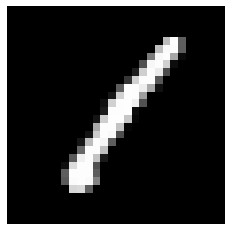

In [17]:
img = x_train.iloc[0].to_numpy()
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

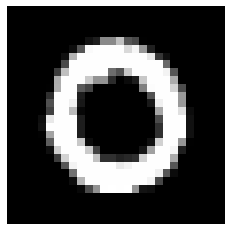

In [18]:
img = x_train.iloc[1].to_numpy()
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

In [27]:
x_train/=255.0
x_test/=255.0

In [31]:
x_train=x_train.values.reshape(-1,28,28,1)
x_test=x_test.values.reshape(-1,28,28,1)

In [32]:
x_train.shape

(42000, 28, 28, 1)

In [33]:
x_test.shape

(28000, 28, 28, 1)

In [34]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)

In [37]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=2)

In [39]:
x_val.shape

(4200, 28, 28, 1)

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

In [41]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [42]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [43]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [44]:
model.fit(x_train, y_train, batch_size=250, epochs=10, validation_data=(x_val,y_val))

Epoch 1/10
152/152 [==============================] - 20s 135ms/step - loss: 0.7662 - accuracy: 0.7524 - val_loss: 0.2263 - val_accuracy: 0.9448
Epoch 2/10
152/152 [==============================] - 20s 134ms/step - loss: 0.2803 - accuracy: 0.9123 - val_loss: 0.1281 - val_accuracy: 0.9626
Epoch 3/10
152/152 [==============================] - 20s 133ms/step - loss: 0.1947 - accuracy: 0.9390 - val_loss: 0.0929 - val_accuracy: 0.9688
Epoch 4/10
152/152 [==============================] - 20s 133ms/step - loss: 0.1533 - accuracy: 0.9510 - val_loss: 0.0782 - val_accuracy: 0.9743
Epoch 5/10
152/152 [==============================] - 20s 132ms/step - loss: 0.1356 - accuracy: 0.9576 - val_loss: 0.0666 - val_accuracy: 0.9769
Epoch 6/10
152/152 [==============================] - 20s 132ms/step - loss: 0.1218 - accuracy: 0.9617 - val_loss: 0.0598 - val_accuracy: 0.9800
Epoch 7/10
152/152 [==============================] - 20s 132ms/step - loss: 0.1109 - accuracy: 0.9650 - val_loss: 0.0547 - val_ac

In [45]:
y_predict=model.predict(x_test)

In [46]:
predictions = np.argmax(y_predict,axis = 1)

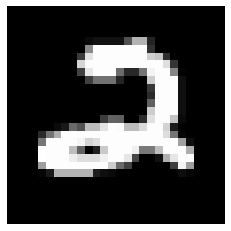

In [48]:
img = test.iloc[0].to_numpy()
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

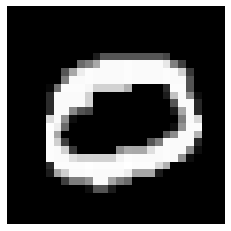

In [49]:
img = test.iloc[1].to_numpy()
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

In [50]:
predictions

array([2, 0, 9, ..., 3, 9, 2])